# Data Exploration

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from tqdm import tqdm

from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_members = pd.read_csv('../data/members.csv')
df_songs = pd.read_csv('../data/songs.csv')
df_sample = pd.read_csv('../data/sample_submission.csv')

members.csv
sample_submission.csv
song_extra_info.csv
songs.csv
test.csv
train.csv



## Train Dataframe

In [6]:
print(df_train.shape)
df_train.head()

(7377418, 6)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


## Members Dataframe

In [7]:
print(df_members.shape)
df_members.head()

(34403, 7)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


## Songs Dataframe

In [8]:
print(df_songs.shape)
df_songs.head()

(2296320, 7)


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


## Test Dataframe

In [9]:
print(df_test.shape)
df_test.head()

(2556790, 6)


,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


Let's visualize the attributes file by file. Later on files are merged to perform further in-depth investigation.
#### train.csv

###### source_type

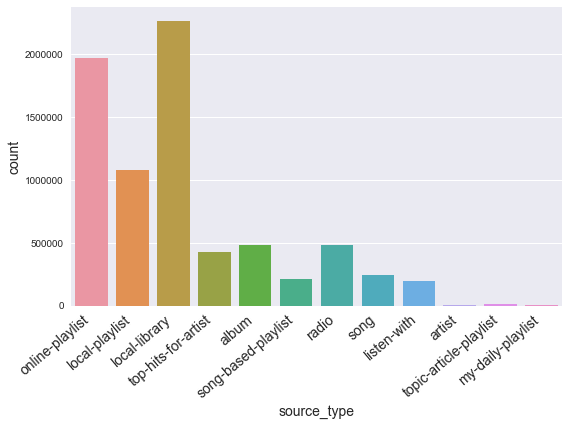

In [22]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_type", data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=40, ha="right")
ax.set_ylabel('count', size=14)
ax.set_xlabel('source_type', size=14)
plt.tight_layout()
plt.show()

###### source_screen_name

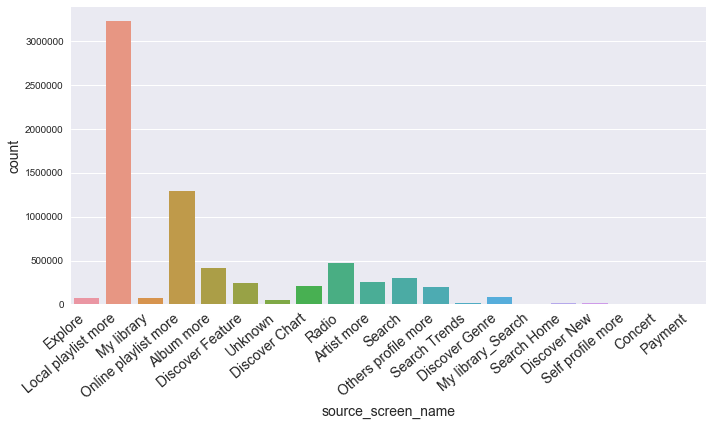

In [23]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "source_screen_name", data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=40, ha="right")
ax.set_ylabel('count', size=14)
ax.set_xlabel('source_screen_name', size=14)
plt.tight_layout()
plt.show()

##### source_system_tab

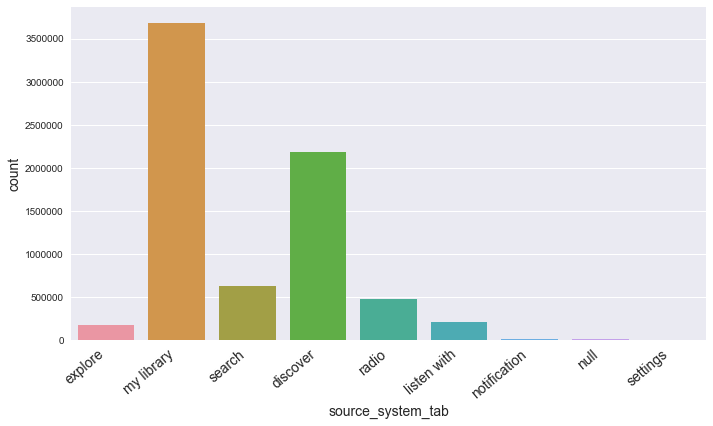

In [24]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "source_system_tab", data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=40, ha="right")
ax.set_ylabel('count', size=14)
ax.set_xlabel('source_system_tab', size=14)
plt.tight_layout()
plt.show()

#### members.csv
city bd gender registered_via

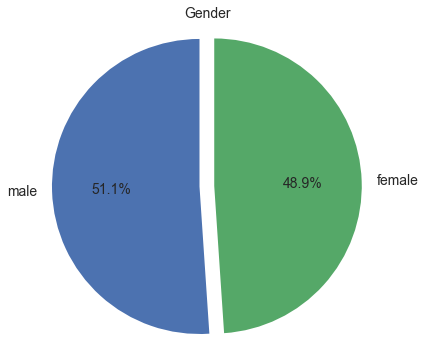

In [34]:
plt.figure(figsize = (6, 6))
pp = pd.value_counts(df_members.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05), fontsize=14)
plt.ylabel('')
plt.title('Gender', fontsize=14)
plt.axis('equal')
plt.show()

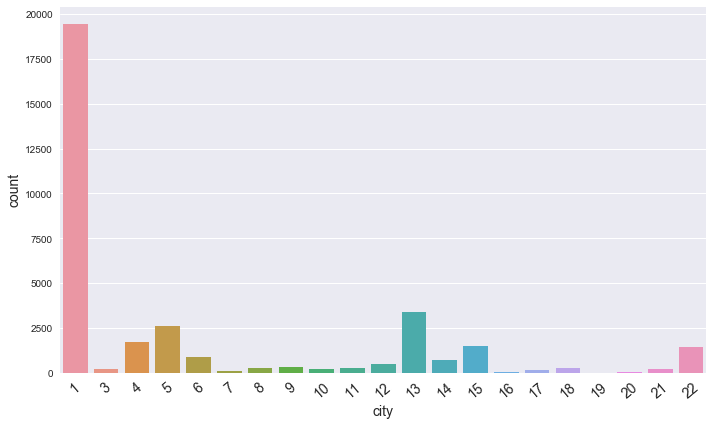

In [38]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "city", data = df_members)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=40, ha="center")
ax.set_ylabel('count', size=14)
ax.set_xlabel('city', size=14)
plt.tight_layout()
plt.show()

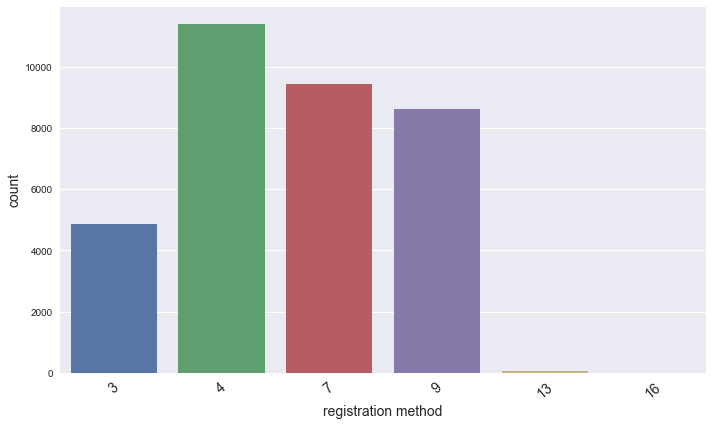

In [40]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "registered_via", data = df_members)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=40, ha="center")
ax.set_ylabel('count', size=14)
ax.set_xlabel('registration method', size=14)
plt.tight_layout()
plt.show()

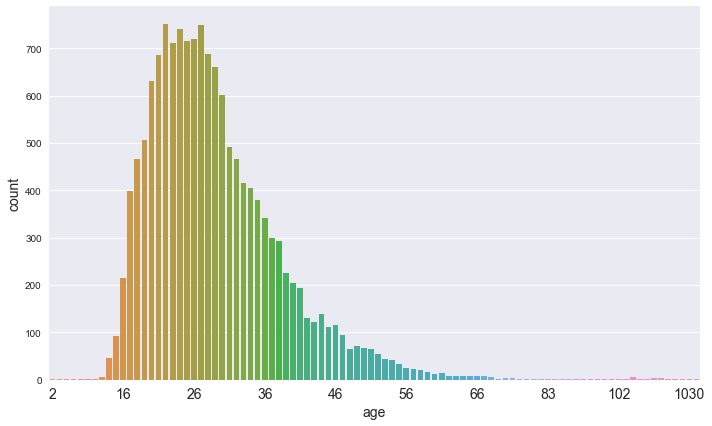

In [65]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "bd", data = df_members.loc[df_members['bd']>0])
x_ticks = ax.get_xticks()
x_ticks_points = range(0,len(x_ticks),10)
x_ticks_sparse = [xt for idxt, xt in enumerate(x_ticks) if idxt in x_ticks_points]
x_ticks_label_sparse = [xtl for idxtl, xtl in enumerate(ax.get_xticklabels()) if idxtl in x_ticks_points]
ax.set_xticks(x_ticks_sparse)
ax.set_xticklabels(x_ticks_label_sparse, fontsize=14)
ax.set_ylabel('count', size=14)
ax.set_xlabel('age', size=14)
plt.tight_layout()
plt.show()

In [47]:
10 in range(0,92,10)

True